In [1]:
import numpy as np
import pandas as pd

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from pandas_profiling import ProfileReport

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [2]:
data = pd.read_csv('UCI_Credit_Card.csv')
df = data.copy()

- Load the dataset

## Quick Look at the Data Structure

In [3]:
df.shape

(30000, 25)

- Dataset contains 30,000 rows and 25 columns

In [4]:
df.head(5)

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,-2,-2,3913.0,3102.0,689.0,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,0,2,2682.0,1725.0,2682.0,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,0,0,29239.0,14027.0,13559.0,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,0,0,46990.0,48233.0,49291.0,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,0,0,8617.0,5670.0,35835.0,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


In [5]:
df.iloc[42:44,:]

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
42,43,10000.0,1,2,2,22,0,0,0,0,0,0,1877.0,3184.0,6003.0,3576.0,3670.0,4451.0,1500.0,2927.0,1000.0,300.0,1000.0,500.0,0
43,44,140000.0,2,2,1,37,0,0,0,0,0,0,59504.0,61544.0,62925.0,64280.0,67079.0,69802.0,3000.0,3000.0,3000.0,4000.0,4000.0,3000.0,0


In [6]:
new_col = ['ID',
 'LIMIT_BAL',
 'SEX',
 'EDUCATION',
 'MARRIAGE',
 'AGE',
 'PAY_Sep05',
 'PAY_Aug05',
 'PAY_Jul05',
 'PAY_Jun05',
 'PAY_May05',
 'PAY_Apr05',
 'BILL_AMT_Sep05',
 'BILL_AMT_Aug05',
 'BILL_AMT_Jul05',
 'BILL_AMT_Jun05',
 'BILL_AMT_May05',
 'BILL_AMT_Apr05',
 'PAY_AMT_Sep05',
 'PAY_AMT_Aug05',
 'PAY_AMT_Jul05',
 'PAY_AMT_Jun05',
 'PAY_AMT_May05',
 'PAY_AMT_Apr05',
 'default.payment.next.month']

In [7]:
df.columns = new_col

- Rename column names to corresponding month/year

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
ID                            30000 non-null int64
LIMIT_BAL                     30000 non-null float64
SEX                           30000 non-null int64
EDUCATION                     30000 non-null int64
MARRIAGE                      30000 non-null int64
AGE                           30000 non-null int64
PAY_Sep05                     30000 non-null int64
PAY_Aug05                     30000 non-null int64
PAY_Jul05                     30000 non-null int64
PAY_Jun05                     30000 non-null int64
PAY_May05                     30000 non-null int64
PAY_Apr05                     30000 non-null int64
BILL_AMT_Sep05                30000 non-null float64
BILL_AMT_Aug05                30000 non-null float64
BILL_AMT_Jul05                30000 non-null float64
BILL_AMT_Jun05                30000 non-null float64
BILL_AMT_May05                30000 non-null float64
BILL_AMT_Apr

- No missing values
- Data types all correct
- All input values are numerical

In [9]:
df['ID'].duplicated().sum()

0

In [10]:
df = df.drop('ID', axis=1)

- 'ID' column is rather an index than client identification. Dropped.

In [11]:
df.describe()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_Sep05,PAY_Aug05,PAY_Jul05,PAY_Jun05,PAY_May05,PAY_Apr05,BILL_AMT_Sep05,BILL_AMT_Aug05,BILL_AMT_Jul05,BILL_AMT_Jun05,BILL_AMT_May05,BILL_AMT_Apr05,PAY_AMT_Sep05,PAY_AMT_Aug05,PAY_AMT_Jul05,PAY_AMT_Jun05,PAY_AMT_May05,PAY_AMT_Apr05,default.payment.next.month
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,-0.266200,-0.291100,51223.330900,49179.075167,4.701315e+04,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,1.133187,1.149988,73635.860576,71173.768783,6.934939e+04,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-165580.000000,-69777.000000,-1.572640e+05,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,3558.750000,2984.750000,2.666250e+03,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,22381.500000,21200.000000,2.008850e+04,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,67091.000000,64006.250000,6.016475e+04,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,964511.000000,983931.000000,1.664089e+06,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


- Summary of each numerical feature

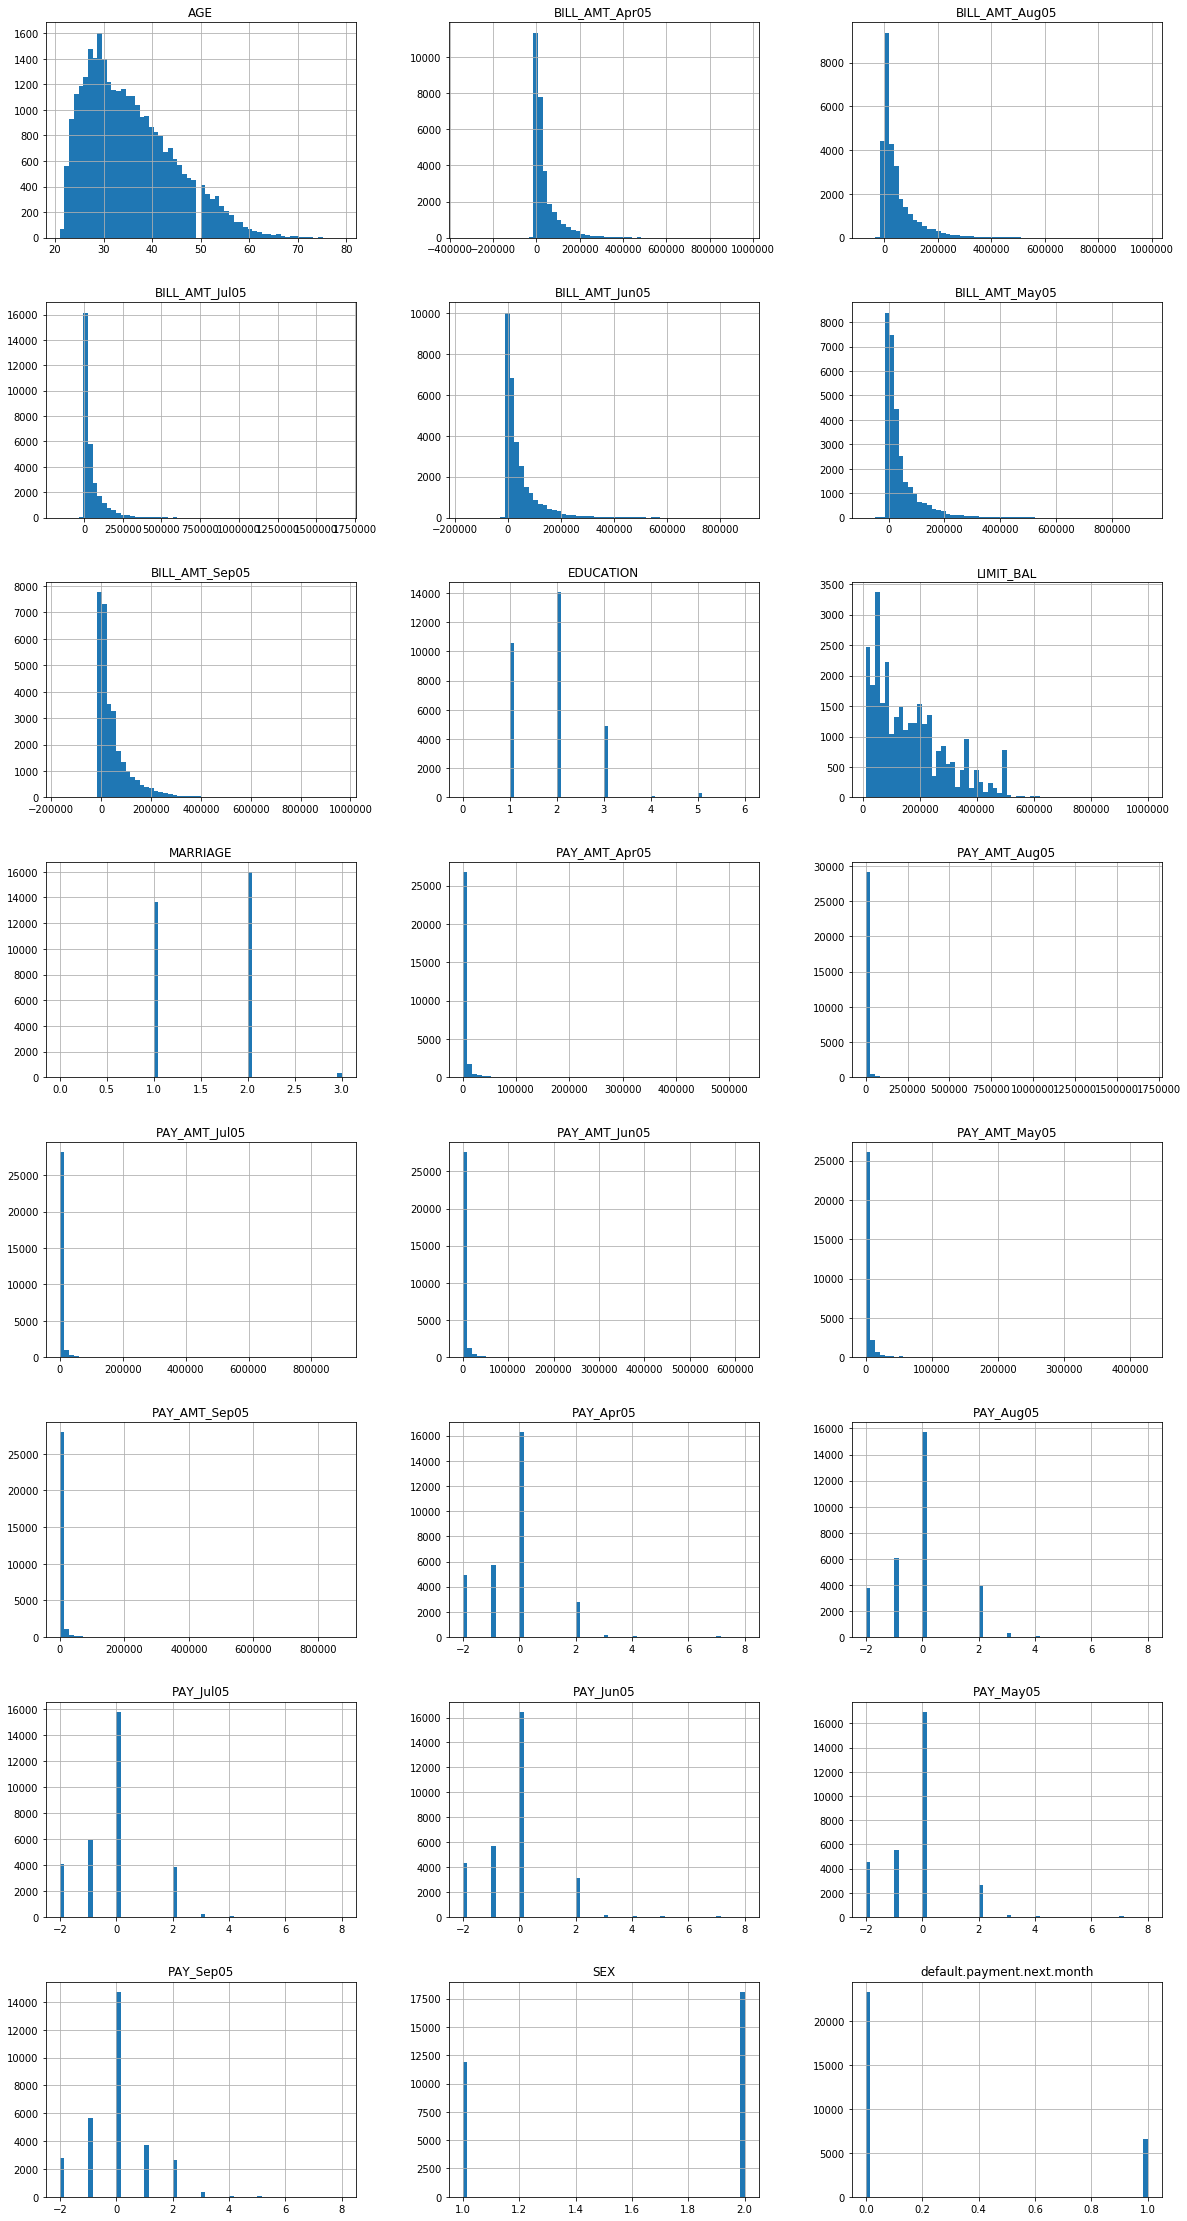

In [12]:
df.hist(bins=60, layout=(8,3), figsize=(20,40))
plt.show();

- A quick look at the distribution of input values of all features

## Preprocessing

In [13]:
df_train, df_test = train_test_split(df, test_size=0.2, random_state=42)

- Create train and test set

In [14]:
df_train['default.payment.next.month'].value_counts()/len(df_train)

0    0.778208
1    0.221792
Name: default.payment.next.month, dtype: float64

In [15]:
df_test['default.payment.next.month'].value_counts()/len(df_test)

0    0.781167
1    0.218833
Name: default.payment.next.month, dtype: float64

- Verify the test set is representative of training set
- Data with class imbalance issue

## Data Discovery & Visualization

In [22]:
#ProfileReport(df_train)

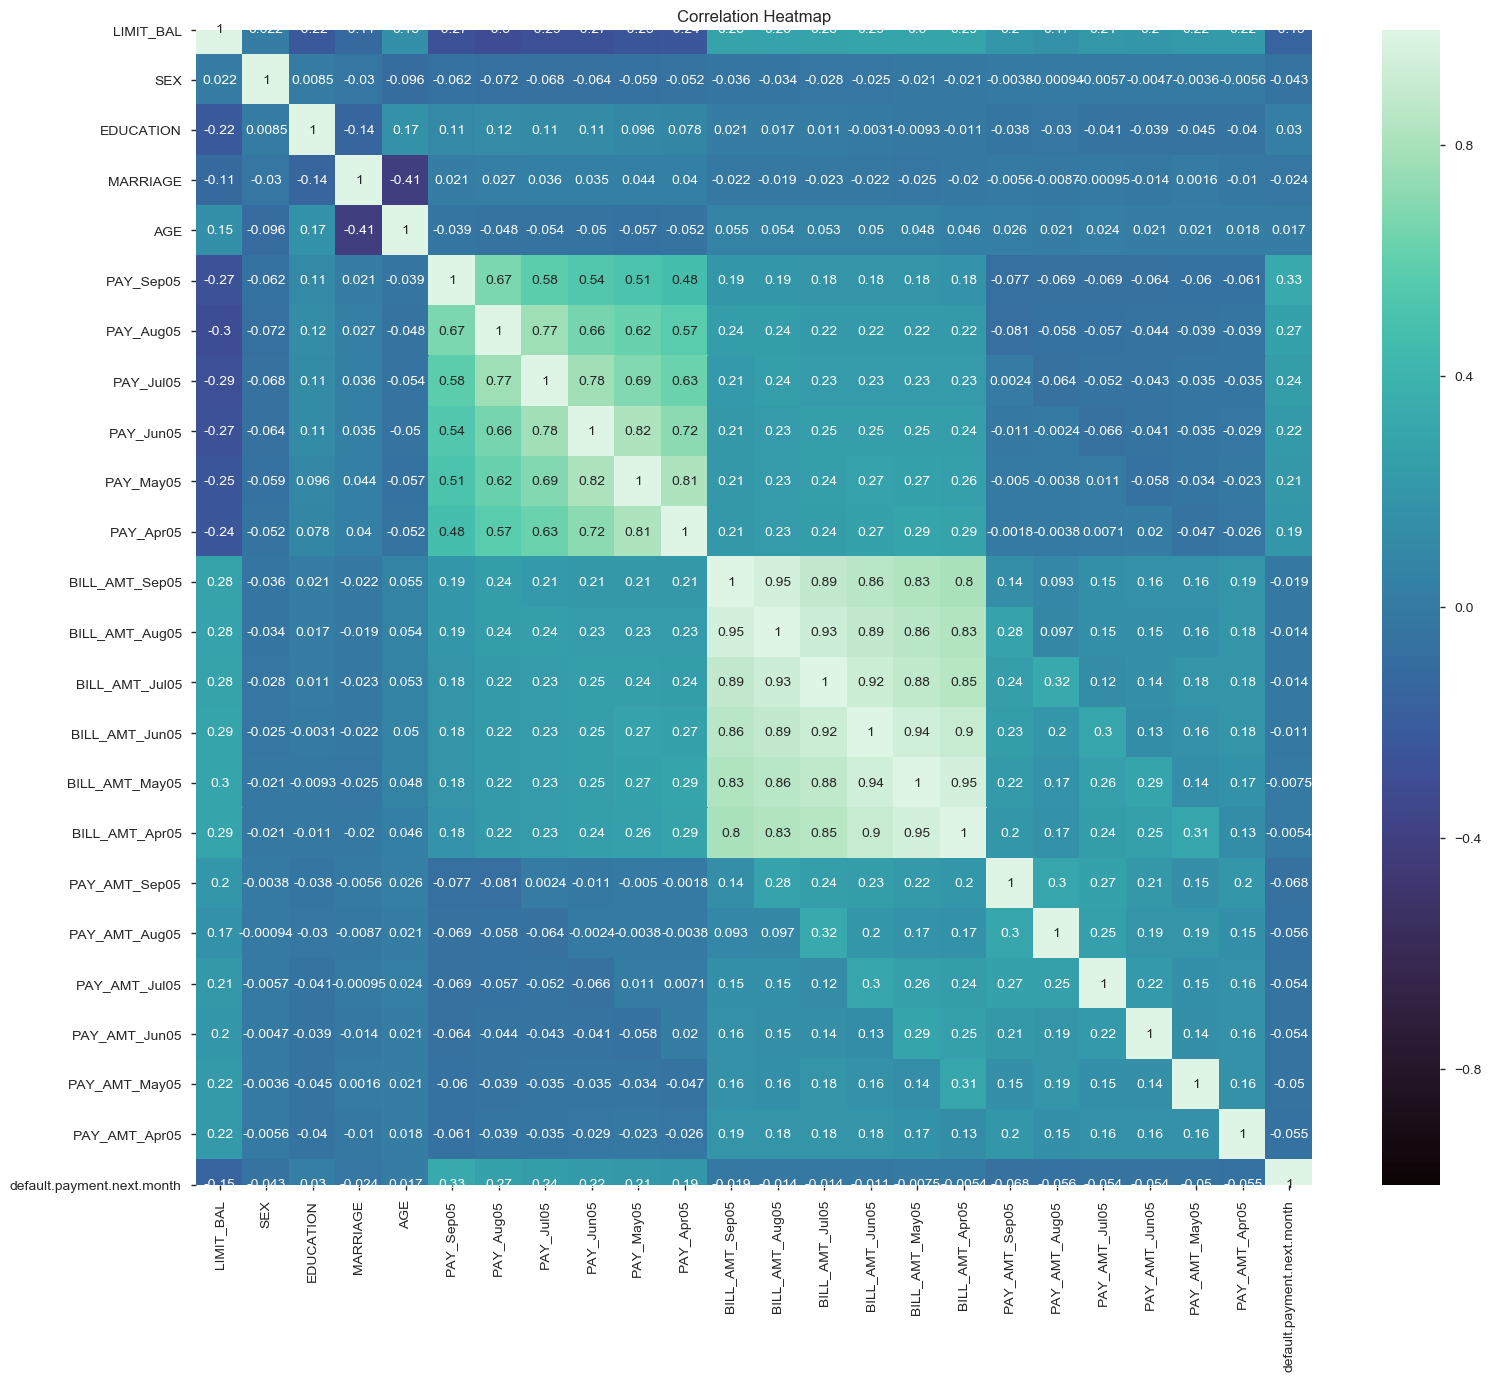

In [17]:
corr = df_train.corr()

plt.figure(figsize=(18, 15))
sns.heatmap(corr, annot=True, vmin=-1.0, cmap='mako')
plt.title('Correlation Heatmap')
plt.show();

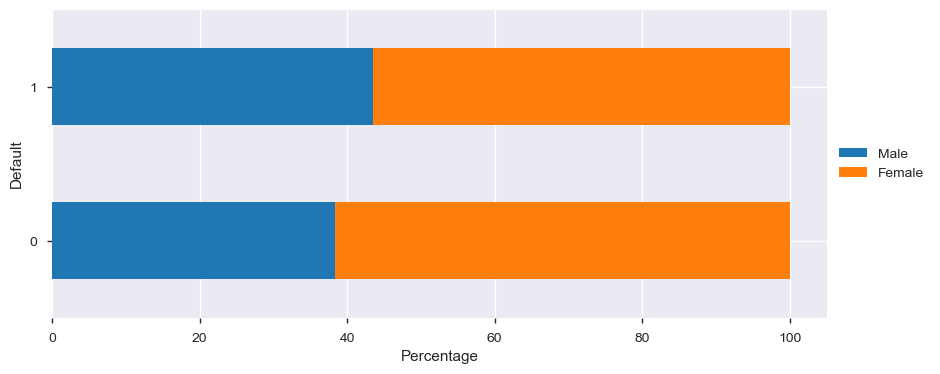

In [18]:
df_plot = df_train.groupby(['default.payment.next.month', 'SEX'])['SEX'].count().to_frame('Count').reset_index()
df_plot = pd.pivot_table(df_plot, values='Count', index=['default.payment.next.month'], columns='SEX')
df_plot.columns = ['Male', 'Female']

df_plot['Sum'] = df_plot['Male'] + df_plot['Female']
df_plot['Male'] = df_plot['Male'] / df_plot['Sum'] * 100
df_plot['Female'] = df_plot['Female'] / df_plot['Sum'] * 100
df_plot = df_plot.drop('Sum', axis=1)

df_plot.plot(kind='barh', stacked=True, figsize=(10,4))
plt.xlabel('Percentage')
plt.ylabel('Default')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show();

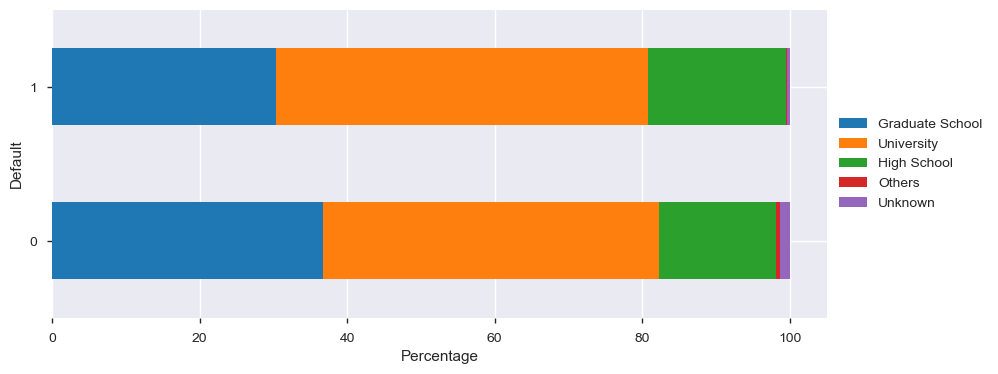

In [19]:
df_plot = df_train.groupby(['default.payment.next.month', 'EDUCATION'])['EDUCATION'].count().to_frame('Count').reset_index()
df_plot = pd.pivot_table(df_plot, values='Count', index=['default.payment.next.month'], columns='EDUCATION')
df_plot = df_plot.fillna(0)
df_plot['Unknown'] = df_plot[0] + df_plot[5] + df_plot[6]
df_plot = df_plot.drop([0, 5, 6], axis=1)
df_plot['Sum'] = df_plot[list(df_plot.columns)].sum(axis=1)
df_plot.columns = ['Graduate School', 'University', 'High School', 'Others', 'Unknown', 'Sum']

df_plot['Graduate School'] = df_plot['Graduate School'] / df_plot['Sum'] * 100
df_plot['University'] = df_plot['University'] / df_plot['Sum'] * 100
df_plot['High School'] = df_plot['High School'] / df_plot['Sum'] * 100
df_plot['Others'] = df_plot['Others'] / df_plot['Sum'] * 100
df_plot['Unknown'] = df_plot['Unknown'] / df_plot['Sum'] * 100
df_plot = df_plot.drop('Sum', axis=1)

df_plot.plot(kind='barh', stacked=True, figsize=(10,4))
plt.xlabel('Percentage')
plt.ylabel('Default')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show();

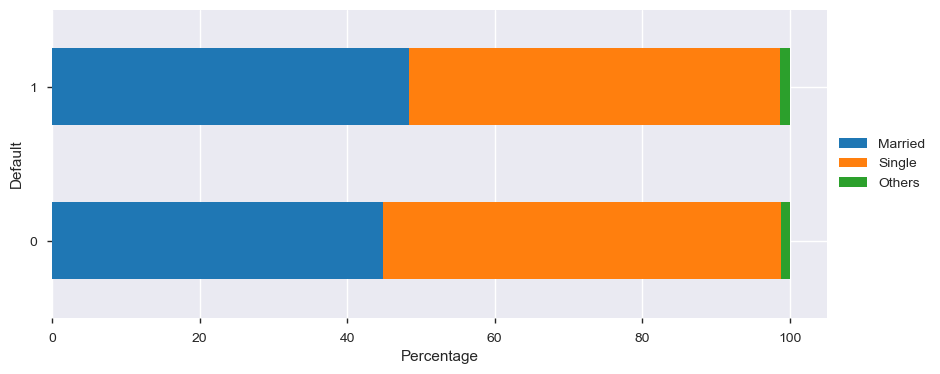

In [20]:
df_plot = df_train.groupby(['default.payment.next.month', 'MARRIAGE'])['MARRIAGE'].count().to_frame('Count').reset_index()
df_plot = pd.pivot_table(df_plot, values='Count', index=['default.payment.next.month'], columns='MARRIAGE')
df_plot['Others'] = df_plot[0] + df_plot[3]
df_plot = df_plot.drop([0, 3], axis=1)
df_plot['Sum'] = df_plot[list(df_plot.columns)].sum(axis=1)
df_plot.columns = ['Married', 'Single', 'Others', 'Sum']

df_plot['Married'] = df_plot['Married'] / df_plot['Sum'] * 100
df_plot['Single'] = df_plot['Single'] / df_plot['Sum'] * 100
df_plot['Others'] = df_plot['Others'] / df_plot['Sum'] * 100
df_plot = df_plot.drop('Sum', axis=1)

df_plot.plot(kind='barh', stacked=True, figsize=(10,4))
plt.xlabel('Percentage')
plt.ylabel('Default')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show();

In [21]:
df.head(0)

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_Sep05,PAY_Aug05,PAY_Jul05,PAY_Jun05,PAY_May05,PAY_Apr05,BILL_AMT_Sep05,BILL_AMT_Aug05,BILL_AMT_Jul05,BILL_AMT_Jun05,BILL_AMT_May05,BILL_AMT_Apr05,PAY_AMT_Sep05,PAY_AMT_Aug05,PAY_AMT_Jul05,PAY_AMT_Jun05,PAY_AMT_May05,PAY_AMT_Apr05,default.payment.next.month
